# Affichage des données MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.base import BaseEstimator

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist['target'] = mnist['target'].astype('uint8')

## 1. Clustering

In [4]:
X = mnist['data']
y = mnist['target']

In [5]:
# Partitionnement de la base de données
X_train, y_train = X[:60000,:], y[:60000]
X_test, y_test = X[60000:,:], y[60000:]

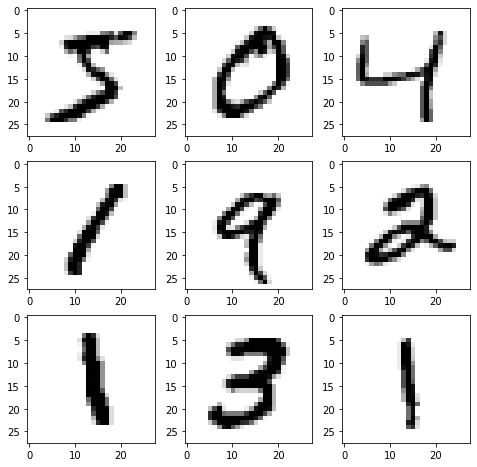

In [6]:
# Affichage des 9 premières images de la bdd
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X[i,:].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [7]:
# On normalise les données
X_train = X_train.astype(float)/255.0
X_test = X_test.astype(float)/255.0

In [8]:
# Clustering avec Kmeans
kmeans = MiniBatchKMeans(n_clusters=10)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [9]:
# Fonction qui associe un label le plus probable
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels

In [10]:
# Fonction qui détermine le label de chaque vecteur
def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key    
    return predicted_labels

In [11]:
# Test de l'algorithme et visualisation des prédictions
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y_train[:20])

[0 0 9 1 7 2 1 3 1 7 3 1 3 6 1 7 2 1 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [12]:
# Fonction pour l'affichage des itérations
def calculate_metrics(estimator, data, labels):
    print(f'Number of Clusters: {estimator.n_clusters}')
    print(f'Inertia: {estimator.inertia_}')
    print(f'Homogeneity: {metrics.homogeneity_score(labels, estimator.labels_)}')

In [14]:
# Test de l'algorithme avec différents clusters
clusters = [10, 16, 36, 64, 144, 256]
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X_test)
    calculate_metrics(estimator, X_test, y_test)
    cluster_labels = infer_cluster_labels(estimator, y_test)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    print(f'Accuracy: {metrics.accuracy_score(y_test, predicted_Y)}\n')

Number of Clusters: 10
Inertia: 397224.4831725381
Homogeneity: 0.463702789423725
Accuracy: 0.5356

Number of Clusters: 16
Inertia: 364884.46365728957
Homogeneity: 0.6009923483044621
Accuracy: 0.6854

Number of Clusters: 36
Inertia: 324586.1845281287
Homogeneity: 0.6947678663551349
Accuracy: 0.7675

Number of Clusters: 64
Inertia: 300005.9631216773
Homogeneity: 0.7538907389027311
Accuracy: 0.8242

Number of Clusters: 144
Inertia: 267680.8264722724
Homogeneity: 0.8165250187509535
Accuracy: 0.8692

Number of Clusters: 256
Inertia: 246973.42088482596
Homogeneity: 0.8546605459831272
Accuracy: 0.8974

